## Intro

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/timothymiller/Desktop/Dataset-SS')

In [3]:
# excel file of 4 sheets
file = pd.ExcelFile('schoolshootingdatabase.xlsx')

In [4]:
all_sheets = file.sheet_names # gets list of all sheet names
dfs = {sheet: file.parse(sheet) for sheet in all_sheets} # dictionary of dataframes for each sheet

In [5]:
for sheetname in all_sheets:
    print(sheetname)

Cover
Incident
Shooter
Victim
Weapon


In [6]:
incident = dfs['Incident']
shooter = dfs['Shooter']
victim = dfs['Victim']
weapon = dfs['Weapon']

# Incident Dataset

## EDA / Cleanup

In [7]:
incident.head()

,Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,...,Situation,Targets,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Active_Shooter_FBI
0,20230329GANED,3,29,2023,2023-03-29,New Manchester High School,0,0,0,1,...,NaN,Neither,No,No,No,No,No,No,No,No
1,20230327TNCON,3,27,2023,2023-03-27,Covenant School,6,1,7,1,...,Indiscriminate Shooting,Random Shooting,No,No,No,No,NaN,No,No,Yes
2,20230324INNOM,3,24,2023,2023-03-24,Northridge Middle School,0,0,0,1,...,Suicide/Attempted,Victims Targeted,No,No,No,No,No,No,No,No
3,20230324NJTHM,3,24,2023,2023-03-24,Thunderbolt Academy,0,0,0,0,...,NaN,Victims Targeted,No,No,No,No,No,No,NaN,No
4,20230322ALANA,3,22,2023,2023-03-22,Anniston High School,0,1,1,0,...,Accidental,Neither,No,No,No,No,No,No,No,No


In [8]:
columns = incident.columns
print(columns)

Index(['Incident_ID', 'Month', 'Day', 'Year', 'Date', 'School',
       'Victims_Killed', 'Victims_Wounded', 'Number_Victims', 'Shooter_Killed',
       'Source', 'Number_News', 'Media_Attention', 'Reliability', 'Quarter',
       'City', 'State', 'School_Level', 'Location', 'Location_Type',
       'During_School', 'Time_Period', 'First_Shot', 'Duration_min', 'Summary',
       'Narrative', 'Situation', 'Targets', 'Accomplice', 'Hostages',
       'Barricade', 'Officer_Involved', 'Bullied', 'Domestic_Violence',
       'Gang_Related', 'Active_Shooter_FBI'],
      dtype='object')


In [31]:
count_by_year = incident['Year'].value_counts().reset_index()

,index,Year
0,2022,303
1,2021,250
2,2019,119
3,2018,119
4,2020,114
5,2023,90
6,2006,59
7,2017,58
8,2016,50
9,1993,47


In [29]:
bin_num = incident['Year'].max() - incident['Year'].min()

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
         38.],
        [45.,  3.,  4.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.]]),
 array([  11.        ,   48.96226415,   86.9245283 ,  124.88679245,
         162.8490566 ,  200.81132075,  238.77358491,  276.73584906,
         314.69811321,  352.66037736,  390.62264151,  428.58490566,
         466.54716981,  504.50943396,  542.47169811,  580.43396226,
         618.39622642,  656.35849057,  694.32075472,  732.28301887,
         770.24528302,  808.20754717

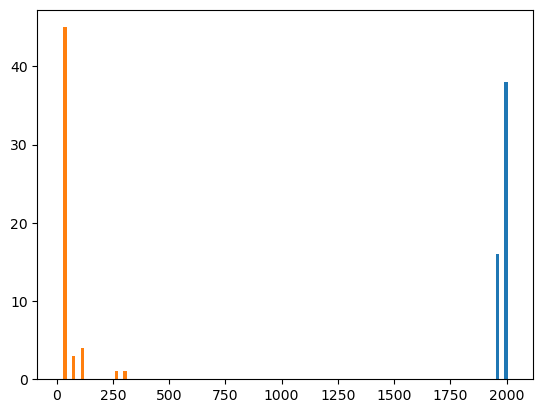

In [30]:
plt.hist(count_by_year[''], bins=bin_num)

In [10]:
count_by_situation = incident['Situation'].value_counts().reset_index()

In [11]:
count_by_targets = incident['Targets'].value_counts().reset_index()

In [12]:
# specify dataframe of incidents where there is at least 1 fatality
fatal_incidents = incident[(incident['Victims_Killed'] >= 1) | (incident['Shooter_Killed'] >= 1)]

In [13]:
incident.dtypes

Incident_ID                   object
Month                          int64
Day                            int64
Year                           int64
Date                  datetime64[ns]
School                        object
Victims_Killed                 int64
Victims_Wounded                int64
Number_Victims                 int64
Shooter_Killed                 int64
Source                        object
Number_News                  float64
Media_Attention               object
Reliability                    int64
Quarter                       object
City                          object
State                         object
School_Level                  object
Location                      object
Location_Type                 object
During_School                 object
Time_Period                   object
First_Shot                    object
Duration_min                 float64
Summary                       object
Narrative                     object
Situation                     object
T

In [14]:
# number of shootings in each state
state_counts = incident['State'].value_counts()
state_counts_fatal = fatal_incidents['State'].value_counts()
# Convert the series to dataframes
state_counts_df = state_counts.reset_index()
state_counts_fatal_df = state_counts_fatal.reset_index()

# Rename the columns
state_counts_df.columns = ['State', 'Total School Shootings']
state_counts_fatal_df.columns = ['State', 'Fatal School Shootings']

# Merge the dataframes
state_counts_df = pd.merge(state_counts_df, state_counts_fatal_df, on='State')

state_counts_df['Fatal / Total'] = state_counts_df['Fatal School Shootings']/state_counts_df['Total School Shootings']

In [18]:
state_counts_df.sort_values(by='Fatal / Total', ascending=False)

,State,Total School Shootings,Fatal School Shootings,Fatal / Total
48,WY,2,2,1.000000
45,ME,5,3,0.600000
46,VT,4,2,0.500000
19,DC,39,18,0.461538
16,WA,49,22,0.448980
42,RI,7,3,0.428571
35,IA,19,8,0.421053
20,CO,36,15,0.416667
31,AZ,22,9,0.409091
0,CA,229,92,0.401747


In [20]:
outliers = ['AL', 'NC', 'NY', 'MI', 'VA']
outlier_dfs = {}

for outlier in outliers:
    outlier_dfs[outlier] = incident[incident['State'] == outlier]


In [21]:
alabama = outlier_dfs['AL']

In [25]:
# during school vs not
incident_during = incident[incident['During_School'] == 'Yes']
fatal_incidents_during = incident_during[(incident_during['Victims_Killed'] >= 1) | (incident_during['Shooter_Killed'] >= 1)]

# number of during-school shootings in each state
state_counts_during = incident_during['State'].value_counts()
state_counts_fatal_during = fatal_incidents_during['State'].value_counts()
# Convert the series to dataframes
state_counts_during_df = state_counts_during.reset_index()
state_counts_fatal_during_df = state_counts_fatal_during.reset_index()

# Rename the columns
state_counts_during_df = ['State', 'Total School Shootings']
state_counts_fatal_during_df.columns = ['State', 'Fatal School Shootings']

# Merge the dataframes
state_counts_during_df = pd.merge(state_counts_during_df, state_counts_fatal_during_df, on='State')

state_counts_during_df['Fatal / Total'] = state_counts_df['Fatal School Shootings']/state_counts_df['Total School Shootings']

TypeError: Can only merge Series or DataFrame objects, a <class 'list'> was passed

# Dashboard

In [31]:
import dash
import dash_table
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash(__name__)


app.layout = html.Div([
    dash_table.DataTable(
        id='table',
        columns=[{"State": i, "Total School Shootings": i, "Fatal School Shootings" : i, "Fatal / Total" : i} for i in result.columns],
        data=result,
    )
])

if __name__ == '__main__':
    app.run_server(debug=False)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


[2023-06-19 23:07:08,033] ERROR in app: Exception on /_dash-layout [GET]
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.9/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Applications/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Applications/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Applications/anaconda3/lib/python3.9/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Applications/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Applications/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/Applications/an

In [26]:
incident[incident['State'] == 'MA']

,Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,...,Situation,Targets,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Active_Shooter_FBI
158,20221009MAWAA,10,9,2022,2022-10-09,Walton Elementary School,0,1,1,0,...,NaN,NaN,No,No,No,No,No,No,NaN,No
165,20221004MAJB,10,4,2022,2022-10-04,Jeremiah Burke High School,0,1,1,0,...,NaN,Victims Targeted,No,No,No,Yes,NaN,No,NaN,No
223,20220805MATHL,8,5,2022,2022-08-05,Thurgood Marshall Middle School,0,0,0,0,...,Escalation of Dispute,Victims Targeted,No,No,No,No,No,No,No,No
299,20220410MALYL,4,10,2022,2022-04-10,Lynn English High School,1,0,1,0,...,NaN,Victims Targeted,No,No,No,No,No,No,NaN,No
332,20220315MATEB,3,15,2022,2022-03-15,Tech Academy Boston,0,2,2,0,...,Drive-by Shooting,Both,Yes,No,No,No,No,No,NaN,No
358,20220218MATET,2,18,2022,2022-02-18,Tewksbury High School,0,0,0,0,...,Drive-by Shooting,Random Shooting,Yes,No,No,No,No,No,No,No
514,20210907MAOMG,9,7,2021,2021-09-07,O’Maley Innovation Middle School,0,0,0,0,...,Intentional Property Damage,Random Shooting,Yes,No,No,No,No,No,No,No
611,20210327MAPEC,3,27,2021,2021-03-27,Peabody Elementary School,1,0,1,0,...,NaN,Victims Targeted,NaN,No,No,No,No,NaN,NaN,No
791,20191009MAGRL,10,9,2019,2019-10-09,Greenhalge Elementary School,0,5,5,0,...,Indiscriminate Shooting,Random Shooting,Yes,No,No,No,NaN,No,No,No
847,20190407MAHOL,4,7,2019,2019-04-07,Hood Elementary School,0,0,0,0,...,Intentional Property Damage,NaN,NaN,No,No,No,No,No,NaN,No
